In [1]:
# from https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [3]:
# To prevent overfitting:
# 1. Use more training data
# 2. Regularization (place constraints on the quantity and type of info model can store)
# If a network can only afford to memorize a small number of patterns, 
# optimization forces it to focus on the most prominent patterns,
# which have better chance of generalizing well.

# Regularization techniques:
# - Weight regularization
# - Dropout

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [4]:
# We will use multi-hot encoding.  This turns our lists into vectors
# of 0's and 1's.
# Turning a sequence [3, 5] into a 10,000-dimensional vector would 
# result all zeros except for indices 3 and 5, which would be ones.

NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

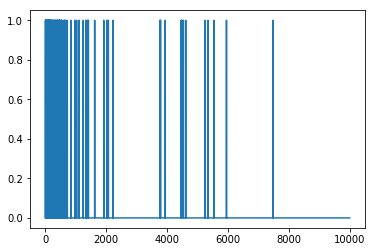

In [5]:
plt.plot(train_data[0])

# Demonstrate Overfitting

In [6]:
# Simplest way to prevent overfitting is to reduce the size 
# of the model (i.e. number of learnable parameters in the 
# model... which is determined by the number of layers and 
# number of units per layer)

# Intuitively, a model with more parameters will have more
# "memorization capacity". This leads to overfitting

# It needs to learn compressed representations that have 
# more predictive power.

In [7]:
# Create a baseline model
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.4861 - acc: 0.8127 - binary_crossentropy: 0.4861 - val_loss: 0.3358 - val_acc: 0.8765 - val_binary_crossentropy: 0.3358
Epoch 2/20
 - 6s - loss: 0.2485 - acc: 0.9109 - binary_crossentropy: 0.2485 - val_loss: 0.2850 - val_acc: 0.8872 - val_binary_crossentropy: 0.2850
Epoch 3/20
 - 5s - loss: 0.1819 - acc: 0.9373 - binary_crossentropy: 0.1819 - val_loss: 0.2901 - val_acc: 0.8852 - val_binary_crossentropy: 0.2901
Epoch 4/20
 - 5s - loss: 0.1446 - acc: 0.9508 - binary_crossentropy: 0.1446 - val_loss: 0.3159 - val_acc: 0.8796 - val_binary_crossentropy: 0.3159
Epoch 5/20
 - 5s - loss: 0.1192 - acc: 0.9606 - binary_crossentropy: 0.1192 - val_loss: 0.3426 - val_acc: 0.8742 - val_binary_crossentropy: 0.3426
Epoch 6/20
 - 5s - loss: 0.0972 - acc: 0.9699 - binary_crossentropy: 0.0972 - val_loss: 0.3728 - val_acc: 0.8710 - val_binary_crossentropy: 0.3728
Epoch 7/20
 - 5s - loss: 0.0789 - acc: 0.9780 - binary_crossentropy:

In [9]:
# Let's create a smaller model with less hidden units to compare
# against baseline.
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train using same data
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 36s - loss: 0.6454 - acc: 0.6710 - binary_crossentropy: 0.6454 - val_loss: 0.5783 - val_acc: 0.7926 - val_binary_crossentropy: 0.5783
Epoch 2/20
 - 5s - loss: 0.4889 - acc: 0.8640 - binary_crossentropy: 0.4889 - val_loss: 0.4394 - val_acc: 0.8674 - val_binary_crossentropy: 0.4394
Epoch 3/20
 - 5s - loss: 0.3539 - acc: 0.9045 - binary_crossentropy: 0.3539 - val_loss: 0.3507 - val_acc: 0.8857 - val_binary_crossentropy: 0.3507
Epoch 4/20
 - 5s - loss: 0.2730 - acc: 0.9203 - binary_crossentropy: 0.2730 - val_loss: 0.3085 - val_acc: 0.8889 - val_binary_crossentropy: 0.3085
Epoch 5/20
 - 5s - loss: 0.2236 - acc: 0.9317 - binary_crossentropy: 0.2236 - val_loss: 0.2897 - val_acc: 0.8895 - val_binary_crossentropy: 0.2897
Epoch 6/20
 - 5s - loss: 0.1892 - acc: 0.9418 - binary_crossentropy: 0.1892 - val_loss: 0.2830 - val_acc: 0.8902 - val_binary_crossentropy: 0.2830
Epoch 7/20
 - 5s - loss: 0.1640 - acc: 0.9499 - binary_crossentropy

In [11]:
# Create a bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train using same data
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 46s - loss: 0.3440 - acc: 0.8552 - binary_crossentropy: 0.3440 - val_loss: 0.2963 - val_acc: 0.8794 - val_binary_crossentropy: 0.2963
Epoch 2/20
 - 23s - loss: 0.1344 - acc: 0.9507 - binary_crossentropy: 0.1344 - val_loss: 0.3599 - val_acc: 0.8634 - val_binary_crossentropy: 0.3599
Epoch 3/20
 - 24s - loss: 0.0412 - acc: 0.9890 - binary_crossentropy: 0.0412 - val_loss: 0.4398 - val_acc: 0.8689 - val_binary_crossentropy: 0.4398
Epoch 4/20
 - 28s - loss: 0.0057 - acc: 0.9994 - binary_crossentropy: 0.0057 - val_loss: 0.5977 - val_acc: 0.8718 - val_binary_crossentropy: 0.5977
Epoch 5/20
 - 24s - loss: 5.8686e-04 - acc: 1.0000 - binary_crossentropy: 5.8686e-04 - val_loss: 0.6810 - val_acc: 0.8718 - val_binary_crossentropy: 0.6810
Epoch 6/20
 - 23s - loss: 2.1054e-04 - acc: 1.0000 - binary_crossentropy: 2.1054e-04 - val_loss: 0.7226 - val_acc: 0.8724 - val_binary_crossentropy: 0.7226
Epoch 7/20
 - 25s - loss: 1.2142e-04 - acc: 1.

# Plot the training and validation loss

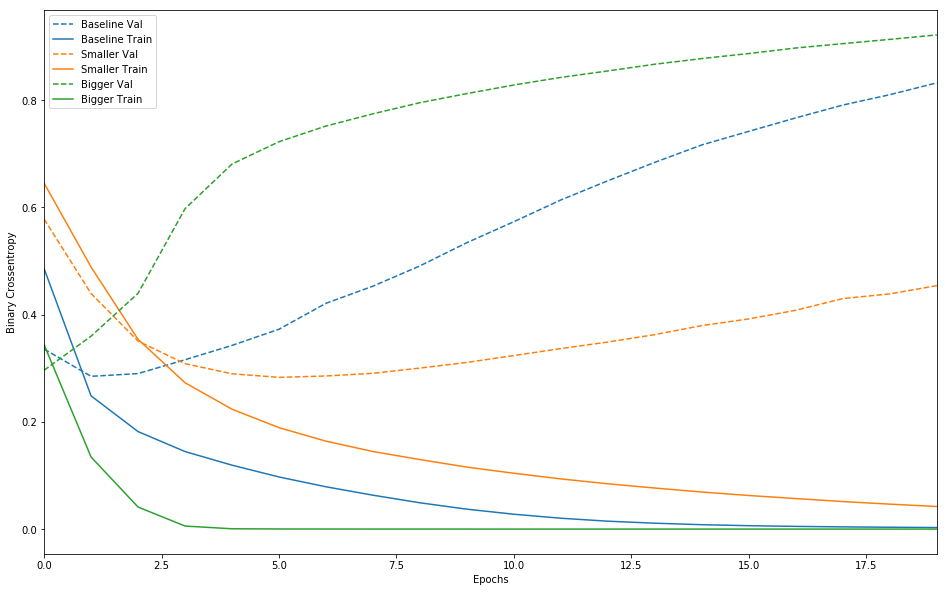

In [13]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
        

plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [14]:
# Add weight regularization
# Simple model is one where distribution of parameter values has
# less entropy. Therefore, mitigate overfitting by putting constraints
# on complexity of network by forcing weights to only take small values.
# This makes the distribution of weight values more 'regular'.
# Weight regularization is done by adding a cost associated with
# having large weights to the loss function

# L1 regularization where cost added proportional to the absolute value
# of the weights coefficients (L1 norm of the weights)

# L2 regularization where cost added is proportional to the square of
# the value of the weights coeficcients (L2 norm of the weights).
# L2 regularization is also called weight decay in the context of neural network.

# l2(0.001) means every coefficient in the weight matrix of the layer
# will add 0.001 * weight_coefficient_value to the total loss of the network.
# NOTE: This penalty is only added at training time. This causes the loss
# of the network to be much higher at training than at test time.
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 30s - loss: 0.5317 - acc: 0.8052 - binary_crossentropy: 0.4930 - val_loss: 0.3802 - val_acc: 0.8760 - val_binary_crossentropy: 0.3398
Epoch 2/20
 - 5s - loss: 0.3024 - acc: 0.9099 - binary_crossentropy: 0.2576 - val_loss: 0.3329 - val_acc: 0.8880 - val_binary_crossentropy: 0.2849
Epoch 3/20
 - 5s - loss: 0.2509 - acc: 0.9293 - binary_crossentropy: 0.2006 - val_loss: 0.3354 - val_acc: 0.8862 - val_binary_crossentropy: 0.2832
Epoch 4/20
 - 5s - loss: 0.2257 - acc: 0.9413 - binary_crossentropy: 0.1720 - val_loss: 0.3484 - val_acc: 0.8835 - val_binary_crossentropy: 0.2936
Epoch 5/20
 - 5s - loss: 0.2127 - acc: 0.9479 - binary_crossentropy: 0.1563 - val_loss: 0.3622 - val_acc: 0.8788 - val_binary_crossentropy: 0.3049
Epoch 6/20
 - 5s - loss: 0.1997 - acc: 0.9522 - binary_crossentropy: 0.1417 - val_loss: 0.3775 - val_acc: 0.8759 - val_binary_crossentropy: 0.3191
Epoch 7/20
 - 5s - loss: 0.1928 - acc: 0.9558 - binary_crossentropy

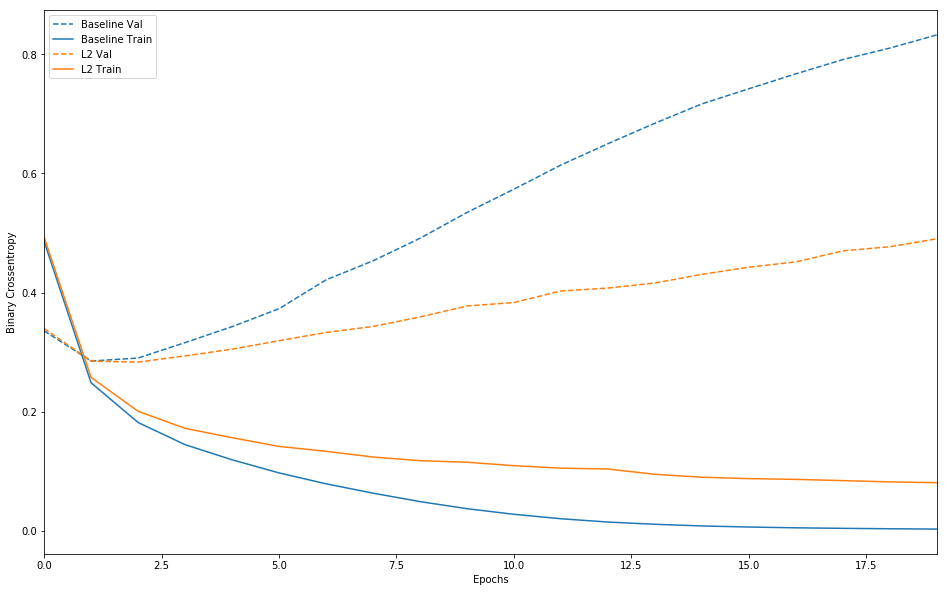

In [15]:
# Impact of L2 regularization penalty
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [16]:
# Dropout is one of the most effiective and most commonly used
# regularization techniques.
# Randomly drops out a number of output features of the layer during
# training.

dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)



Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 33s - loss: 0.6192 - acc: 0.6568 - binary_crossentropy: 0.6192 - val_loss: 0.4941 - val_acc: 0.8398 - val_binary_crossentropy: 0.4941
Epoch 2/20
 - 6s - loss: 0.4572 - acc: 0.8113 - binary_crossentropy: 0.4572 - val_loss: 0.3613 - val_acc: 0.8799 - val_binary_crossentropy: 0.3613
Epoch 3/20
 - 5s - loss: 0.3604 - acc: 0.8736 - binary_crossentropy: 0.3604 - val_loss: 0.3059 - val_acc: 0.8870 - val_binary_crossentropy: 0.3059
Epoch 4/20
 - 5s - loss: 0.2987 - acc: 0.9050 - binary_crossentropy: 0.2987 - val_loss: 0.2849 - val_acc: 0.8857 - val_binary_crossentropy: 0.2849
Epoch 5/20
 - 7s - loss: 0.2592 - acc: 0.9196 - binary_crossentropy: 0.2592 - val_loss: 0.2830 - val_acc: 0.8890 - val_binary_crossentropy: 0.2830
Epoch 6/20
 - 6s - loss: 0.2270 - acc: 0.9310 - binary_crossentropy: 0.2270 - val_loss: 0.2859 - val_acc: 0.8864 - val_binary_crossentropy: 0.2859
Epoch 7/20
 - 6s - loss: 0.1998 - acc: 0.9388 - binary_crossentropy

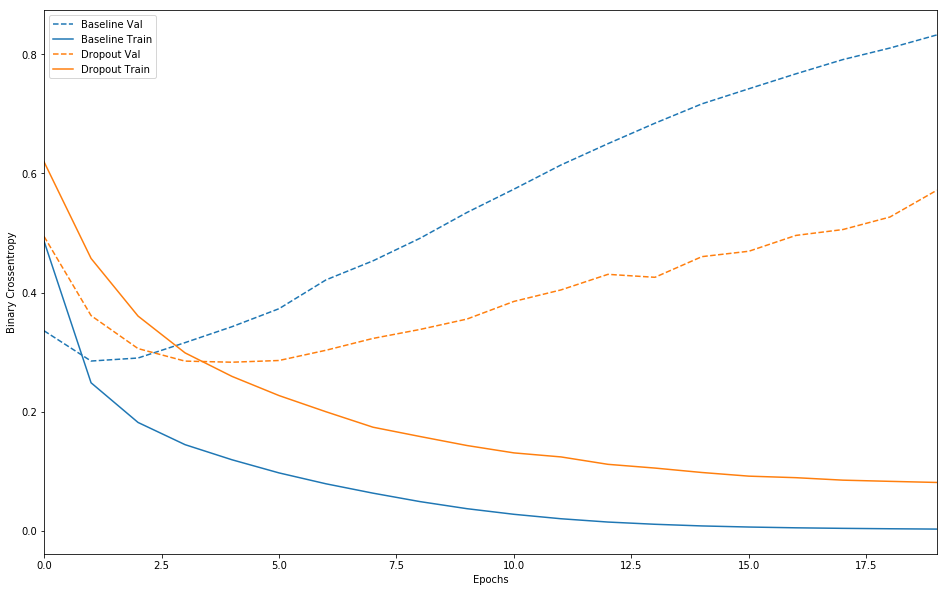

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])